In [2]:
import os
import math
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from weather.darksky import weather_request

## Solar data of Ludenscheid

In [3]:
wr = weather_request(51.247474, 7.601804, "2019-03-28 00:00", 365, 'CET', 'a4b2112ada4def81849c098853d6fd76')
wr.request()
wr.get_pandas()

,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation
time,,,,,,,,,,,,,,,,,,
2019-03-28 00:00:00,Overcast,cloudy,0.0,0.0,5.00,5.00,3.30,0.89,1035.0,0.91,1.05,220,0.97,0,16.093,379.4,NaN,NaN
2019-03-28 01:00:00,Overcast,cloudy,0.0,0.0,5.05,5.05,3.45,0.89,1035.1,0.82,0.82,265,0.96,0,16.093,378.7,NaN,NaN
2019-03-28 02:00:00,Overcast,cloudy,0.0,0.0,4.70,4.70,3.14,0.90,1035.0,0.75,0.75,262,0.88,0,16.093,378.8,NaN,NaN
2019-03-28 03:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,4.29,4.29,2.76,0.90,1034.9,0.73,0.73,230,0.79,0,16.093,378.9,NaN,NaN
2019-03-28 04:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,3.99,3.99,2.52,0.90,1034.7,0.67,0.67,222,0.74,0,16.093,379.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26 19:00:00,Clear,clear-night,0.0,0.0,5.80,3.73,-3.49,0.51,1022.1,2.65,8.70,74,0.00,0,16.093,369.0,NaN,NaN
2020-03-26 20:00:00,Clear,clear-night,0.0,0.0,4.79,2.65,-2.45,0.59,1022.4,2.50,9.33,72,0.01,0,16.093,369.0,NaN,NaN
2020-03-26 21:00:00,Clear,clear-night,0.0,0.0,3.73,1.39,-1.74,0.68,1022.2,2.51,9.93,70,0.02,0,16.093,369.9,NaN,NaN


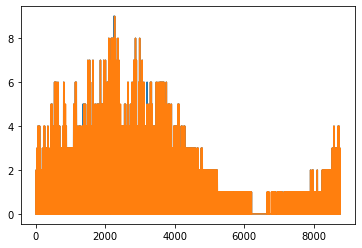

In [13]:
plt.plot(weather_abb.uvIndex.to_numpy())
plt.plot(weather_lu.uvIndex.to_numpy())

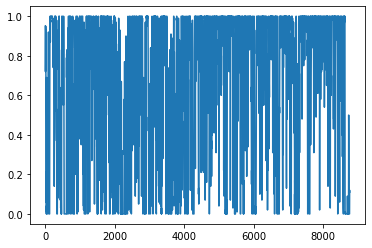

In [6]:
weather_abb = pd.read_csv("weather_2019_51.247474_7.601804.csv", index_col = "time")

In [4]:
weather_lu = pd.read_csv("weather_2019_51.2152_7.62942.csv",index_col = "time")
data = pd.read_csv("../data/376_clean.csv")
data

,Date,Time,Value
0,3/29/19,0:00:00,0.0
1,3/29/19,0:15:00,0.0
2,3/29/19,0:30:00,0.0
3,3/29/19,0:45:00,0.0
4,3/29/19,1:00:00,0.0
...,...,...,...
31483,2/19/20,22:45:00,0.0
31484,2/19/20,23:00:00,0.0
31485,2/19/20,23:15:00,0.0
31486,2/19/20,23:30:00,0.0


In [14]:
data.shape

(31488, 3)

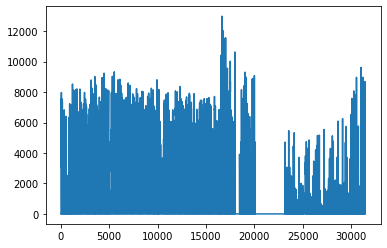

In [16]:
plt.plot(data.Value.to_numpy())


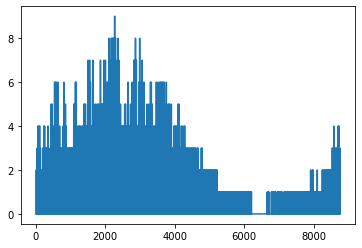

In [17]:
plt.plot(weather_lu.uvIndex.to_numpy())

In [18]:
## deal with timestamp
data['time'] = data.Date + " " +data.Time
data['timestamp'] = data['time'].apply(lambda x: datetime.strptime(x, "%m/%d/%y %H:%M:%S"))
data.drop(['Date','Time','time'], axis = 1, inplace = True)
data.rename(columns={'Value':'energy'}, inplace = True)
data.set_index(['timestamp'], inplace = True)
data.head()

,energy
timestamp,
2019-03-29 00:00:00,0.0
2019-03-29 00:15:00,0.0
2019-03-29 00:30:00,0.0
2019-03-29 00:45:00,0.0
2019-03-29 01:00:00,0.0


In [19]:
## update energy data to per-unit scale
start = '2019-09-17'
pd.options.mode.chained_assignment = None

pre_capacity = 700
post_capacity = 1300

mask_pre = (data.index < start)
mask_post = (data.index >= start)

data[mask_pre] = data[mask_pre]/pre_capacity
data[mask_post] = data[mask_post]/post_capacity

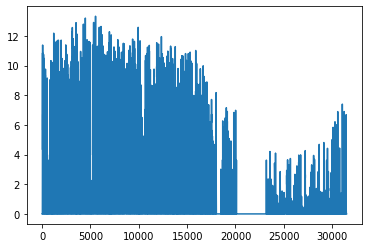

In [20]:
plt.plot(data.to_numpy())

In [15]:
## merge weather data with energy data
solardata = weather_abb.merge(data, how ='right', left_index = True, right_index = True)
solardata = solardata.iloc[:-3,:]
for col in solardata.columns:
    solardata[col] = solardata[col].interpolate(method='linear')
solardata.drop(['precipAccumulation','precipType'], axis = 1, inplace = True)
solardata.index.name = 'timestamp'
solardata.head()

TypeError: '<' not supported between instances of 'int' and 'str'

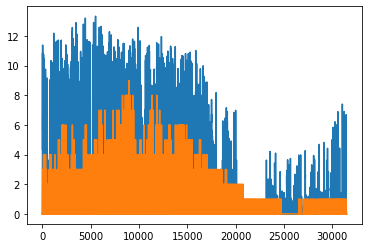

In [21]:
plt.plot(solardata.energy.to_numpy())
plt.plot(solardata.uvIndex.to_numpy())

In [22]:
solardata.shape

(31486, 15)

In [23]:
## split to train and test
solartrain = solardata.iloc[:25190, :]
solartest = solardata.iloc[25190:,:]
solartrain.to_csv("train_solar.csv",index = True)
solartest.to_csv("test_solar.csv", index = True)

# Elia Total Load data

In [9]:
def count_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: data[df_cols[i]].isnull().sum()})
    
    return dict_x

## Extract funciton for Elia Total load data
def elia_extract(name):
    excludes = ["02:00*","02:15*","02:30*","02:45*"]
    elia_load = pd.read_csv(name)
    elia_load.replace('NOT VALID', np.NaN, inplace=True)
    for ex in excludes:
        elia_load = elia_load.loc[elia_load['RowTime'] != ex]
    elia_load.to_csv("{}_clean".format(name), index = True)
    ## combine to datetime
    elia_load = pd.read_csv("{}_clean".format(name), parse_dates=[['RowDate','RowTime']])
    elia_load.drop(columns=['Unnamed: 0'], inplace = True)
    elia_load['TotalLoad'] = elia_load['TotalLoad'].interpolate(method='linear')
    ## fix index and weekday extraction
    elia_load = elia_load.rename(columns={'RowDate_RowTime':'time'})
    elia_load["Weekday"] = elia_load['time'].dt.day_name()
    elia_load.set_index(elia_load['time'], inplace = True)
    elia_load.drop(columns=['time'], inplace = True)
    return elia_load

## Extract funciton for Elia Grid load data


In [10]:
elia_2020 = elia_extract("Total_load_2020.csv")

In [11]:
elia_2019 = elia_extract("Total_load_2019.csv")

# Elia grid load data

In [3]:
## expanse by rows * columns
elia = pd.read_csv("ELIA_LOAD_2019.csv",header = 1)
elia.replace('NOT VALID', np.NaN, inplace=True)
elia = elia.iloc[:,:99]

date_list = []
for i in range(elia.shape[0]):
    date_list.append("{}-{}-{}".format(elia['yyyy'][i],elia['mm'][i],elia['dd'][i]))
elia["time"] = date_list

elia.drop(columns = ['dd','mm'], inplace = True)
elia.set_index(elia["time"], inplace= True)
elia.drop(columns = ['time'], inplace=True)

In [4]:
## fix 24:00 to the next day 00:00
elia['0:00'] = elia.iloc[:,-1].shift()
## swap
cols = list(elia.columns)
a, b = cols.index('yyyy'), cols.index('0:00')
cols[b], cols[a] = cols[a], cols[b]
elia = elia[cols]

elia.drop(columns=['24:00','yyyy'], inplace = True)


## Expanse the data set
index_list = []
energy_list = []
for date in elia.index:
    for time in elia.columns:
        #special case handling
        #if time == "24:00":
        #    index_list.append("{} {}".format(date , "00:00"))
        #else:
        index_list.append("{} {}".format(date, time))
        energy_list.append(elia.loc[date, time])
elia_qh = pd.DataFrame(list(zip(index_list,energy_list)),  columns=['time','grid_load'])
elia_qh.head()


##type transformation
elia_qh['time'] = elia_qh['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))
elia_qh["grid_load"] = elia_qh["grid_load"].astype("float64")
elia_qh['time'] = elia_qh['time'].astype("datetime64")
elia_qh.dtypes
## index setting
elia_qh.set_index(elia_qh['time'], inplace = True)
elia_qh.drop(columns = ['time'], inplace = True)
elia_qh.to_csv("elia_qh.csv", index = True)


/Users/fuchucheng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.


In [5]:
elia_qh = pd.read_csv("elia_qh.csv", index_col='time')
elia_qh.shape

(35040, 1)

### To prevent data leakage we split trian and test first

In [6]:
##8256
elia_train = elia_qh.iloc[:5781,:]
elia_test = elia_qh.iloc[5784:,:]
elia_train.shape, elia_test.shape

((5781, 1), (29256, 1))

**then deal with missing value**

In [11]:
## missing value train
missing = count_missing(elia_train)
print(missing)
## missing value test
missing = count_missing(elia_test)
print(missing)

#missing = count_missing(elia_qh)
#print(missing)

{'grid_load(MW)': 0}
{'grid_load(MW)': 0}


In [9]:
elia_train.fillna(elia_train.median(), inplace=True)
elia_test.fillna(elia_test.median(), inplace=True)
#elia_qh.fillna(elia_qh.median(), inplace = True)

//miniconda3/envs/tpot/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


**scale down the grid load**

In [10]:
elia_train['grid_load(MW)'] = elia_train['grid_load'].apply(lambda x: x/1000000)
elia_test['grid_load(MW)'] = elia_test['grid_load'].apply(lambda x: x/1000000)
elia_train.drop(['grid_load'],axis = 1, inplace = True)
elia_test.drop(['grid_load'],axis = 1, inplace = True)

/Users/fuchucheng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fuchucheng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//miniconda3/envs/tpot/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [19]:
elia_qh['grid_load(MW)'] = elia_qh['grid_load'].apply(lambda x: x/1000000)
elia_qh.drop(['grid_load'],axis = 1, inplace = True)

In [12]:
elia_train.to_csv("elia_train.csv", index = True)
elia_test.to_csv("elia_test.csv", index = True)
#elia_qh.to_csv("elia_2019.csv", index = True)

### weather data from darksky

In [3]:
lat_list = [51.2803, 50.8259, 50.8467, 50.4161]
long_list = [4.2256, 3.2207, 4.3607, 4.4477]

In [8]:
## request weather data in brussels
                    # lat, long, start_date, ndays, timezone, api_key     
for i in range(3,4):
    wr = weather_request(lat_list[i], long_list[i], "2018-12-31 00:00", 367, 'CET', 'a4b2112ada4def81849c098853d6fd76')
    wr.request()
    wr.get_pandas()


In [13]:
weather_2020_1 = pd.read_csv("weather_2020_51.2803_4.2256.csv", index_col = "time")
weather_2019_1 = pd.read_csv("weather_2019_51.2803_4.2256.csv", index_col = "time")
weather_2020_2 = pd.read_csv("weather_2020_50.8467_4.3607.csv", index_col = "time")
weather_2019_2 = pd.read_csv("weather_2019.csv", index_col = "time")
weather_2020_3 = pd.read_csv("weather_2020_50.4161_4.4477.csv", index_col = "time")
weather_2019_3 = pd.read_csv("weather_2019_50.4161_4.4477.csv", index_col = "time")
weather_2020_4 = pd.read_csv("weather_2020_50.8259_3.2207.csv", index_col = "time")
weather_2019_4 = pd.read_csv("weather_2019_50.8259_3.2207.csv", index_col = "time")

**temperature concatination**

In [14]:
weather_2020 = pd.concat([weather_2020_1.temperature,
                          weather_2020_2.temperature,
                          weather_2020_3.temperature,
                          weather_2020_4.temperature], axis = 1)

In [15]:
## remove duplicate rows
weather_2019_1.drop('2019-10-27 02:00:00', inplace = True)
weather_2019_2.drop('2019-10-27 02:00:00', inplace = True)
weather_2019_3.drop('2019-10-27 02:00:00', inplace = True)
weather_2019_4.drop('2019-10-27 02:00:00', inplace = True)
weather_2019 = pd.concat([weather_2019_1.temperature,
                          weather_2019_2.temperature,
                          weather_2019_3.temperature,
                          weather_2019_4.temperature],
                         
                         join = 'inner', 
                         axis = 1)

### Merge weather and load

In [16]:
train_elia = weather_2019.merge(elia_2019, how ='right', left_index = True, right_index = True)
test_elia = weather_2020.merge(elia_2020, how = 'right', left_index = True, right_index = True)

**then deal with missing value by interpolation**

In [18]:
## interpolate nan
for col in train_elia.columns:
    train_elia[col] = train_elia[col].interpolate(method='linear')
for col in test_elia.columns:
    test_elia[col] = test_elia[col].interpolate(method = "linear")

In [19]:
train_elia.to_csv("train_elia.csv",index = True)
test_elia.to_csv("test_elia.csv", index = True)

###  ----------------------------------------------

# London electricity consumption smart meter

In [16]:
elec = pd.read_csv("../smart-meters-in-london/halfhourly_dataset/block_0.csv")
for num in range(1,111):    
    elec = elec.append(pd.read_csv("../smart-meters-in-london/halfhourly_dataset/block_"+str(num)+".csv"))
        

/Users/fuchucheng/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
elec.replace('Null', np.NaN, inplace=True)
energy = elec.iloc[:,:]
energy["energy"] = energy["energy(kWh/hh)"].astype("float64")
energy = energy.drop(["energy(kWh/hh)"],axis = 1)

**Missing values**

In [18]:
missing = missing_count(energy)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Count of missing data')
df_miss[0:10]


Count of missing data


[('energy', 5544), ('LCLid', 0), ('tstp', 0)]

### Single household

In [20]:
energy_MAC1 = energy[energy["LCLid"] == "MAC000010"]

In [21]:
missing = missing_count(energy_MAC1)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Count of missing data')
df_miss[0:10]

Count of missing data


[('energy', 1), ('LCLid', 0), ('tstp', 0)]

In [22]:
energy_MAC1["energy"] = energy_MAC1["energy"].astype("float64")
energy_MAC1["tstp"] = energy_MAC1["tstp"].astype("datetime64")
energy_MAC1 = energy_MAC1.groupby('tstp').agg({'energy': lambda x: x.mean(skipna=False)})
energy_MAC1['tstp'] = energy_MAC1.index
energy_MAC1.drop(['tstp'], axis = 1, inplace=True)


/Users/fuchucheng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fuchucheng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### To prevent data leakage we split trian and test first

In [30]:
train_s = energy_MAC1.iloc[:20000, :]
test_s = energy_MAC1.iloc[20000:,:]

**then deal with missing value half-hr**

In [31]:
train_s.fillna(train_s.median(), inplace = True)
test_s.fillna(test_s.median(), inplace = True)

**resampling to 1hr**

In [32]:
train_s_h = train_s.resample('1H').sum()
test_s_h = test_s.resample('1H').sum()

In [36]:
##Save to csv
train_s.to_csv("train_s_hh.csv", index = True)
test_s.to_csv("train_s_hh.csv", index = True)
train_s_h.to_csv("train_s_h.csv", index = True)
test_s_h.to_csv("train_s_h.csv", index = True)

### Aggregated   household

**Group by LCLid and aggregate over per hour**


In [29]:
## deal with missing value by interpolating mean of whole column
# energy["energy"].fillna(energy["energy"].median(), inplace = True)
## group by time stamps and aggregate through mean
energy["energy"] = energy["energy"].astype("float64")
energy["tstp"] = energy["tstp"].astype("datetime64")
energy = energy.groupby('tstp').agg({'energy': lambda x: x.mean(skipna=False)})
energy['tstp'] = energy.index
energy.drop(['tstp'], axis = 1, inplace=True)

### To prevent data leakage we split trian and test first

In [6]:
train_e = energy.iloc[:28750, :]
test_e = energy.iloc[28750:,:]


**deal with missing value sampling rate: 30 mins**

In [7]:
train_e.fillna(train_e.median(), inplace = True)
test_e.fillna(test_e.median(), inplace = True)


//miniconda3/envs/tpot/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
## check if there is still missing value
missing = missing_count(test_e)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Count of missing data')
df_miss[0:10]


Count of missing data


[('energy', 0)]

**then deal with missing value and resampling to 1hr**

In [31]:
train_e.fillna(train_e.median(), inplace = True)
test_e.fillna(test_e.median(), inplace = True)
train_e = train_e.resample('1H').sum()
test_e = test_e.resample('1H').sum()

//miniconda3/envs/TPOT/lib/python3.5/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
## check if there is still missing value
missing = missing_count(train_e)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Count of missing data')
df_miss[0:10]


Count of missing data


[('energy', 673)]

### Weather datan processing: Londo


In [9]:
weather = pd.read_csv('../smart-meters-in-london/weather_hourly_darksky.csv')

In [10]:
## set index as time stamp
weather = weather.set_index("time")
weather.index = weather.index.astype("datetime64[ns]")

In [11]:
## apparently the sequence in between is not correct
weather = weather.sort_index()

**Missing values**

In [12]:
missing = count_missing(weather)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:]

Percent of missing data


[('pressure', 1300),
 ('visibility', 0),
 ('windBearing', 0),
 ('temperature', 0),
 ('dewPoint', 0),
 ('apparentTemperature', 0),
 ('windSpeed', 0),
 ('precipType', 0),
 ('icon', 0),
 ('humidity', 0),
 ('summary', 0)]

In [13]:
## drop columns wont be used later
weather.drop(['precipType','icon','summary'], axis = 1, inplace=True)

In [14]:
##merge trian and test seperately
train =  weather.merge(train_e, how ='right', left_index = True, right_index = True)
test = weather.merge(test_e.iloc[1:,:], how = 'right', left_index = True, right_index = True)

In [16]:
train.to_csv("hh_train_nan.csv", index = True)
test.to_csv("hh_test_nan.csv", index = True)

In [12]:
train = pd.read_csv("hh_train_nan.csv", index_col='tstp')
test = pd.read_csv("hh_test_nan.csv", index_col='tstp')

In [39]:
## interpolate nan
for col in train.columns:
    train[col] = train[col].interpolate(method='linear')
for col in test.columns:
    test[col] = test[col].interpolate(method = "linear")

In [43]:
## data set without catagorical features
train.to_csv("train_nocat_hh.csv", index = True)
test.to_csv("test_nocat_hh.csv", index = True)

**One hot encoding**

In [73]:
## Examine unique categories in categorical features
p = list(weather["precipType"].unique()) 
i = list(weather["icon"].unique()) 
u = list(weather["summary"].unique())
# Sort them for one hot encoding labels
p.sort()
i.sort()
u.sort()

In [74]:
from sklearn.preprocessing import OneHotEncoder
## One hot encoding these features above
onehot = OneHotEncoder(dtype=np.int, sparse=True)
nominals = pd.DataFrame(onehot.fit_transform(weather[['precipType', 'icon','summary']]).toarray(),columns=p+i+u)
nominals.index = weather.index

In [12]:
#Concate nominals with origin weather dataframe
weather = weather.set_index("time")
weather.index = weather.index.astype("datetime64")
#weather.drop(["precipType","icon","summary"],axis = 1, inplace = True)
weather =  weather.merge(nominals, left_index = True, right_index = True)


KeyError: "None of ['time'] are in the columns"